Scholia pageview statistics
===========================

This notebook will show the Toolforge pageview statistics of Scholia.
The pageviews are detemined through an API call to the "toolviews" Toolforge tool that only 
has data as far back as 30 April 2018.

In [1]:
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url_pattern = "https://toolviews.toolforge.org/api/v1/tool/scholia/daily/{}/{}"

In [3]:
now = datetime.now().isoformat()
start_date = "2018-04-30"
end_date = now[:10]

In [4]:
url = url_pattern.format(start_date, end_date)

In [5]:
response = requests.get(url, headers={'User-Agent': 'Scholia'})

In [6]:
response.ok

True

In [7]:
data = [(key, value['scholia']) for key, value in sorted(response.json()['results'].items())]
df = pd.DataFrame(data, columns=['date', 'page views'])
df = df.set_index('date')

In [8]:
df.sample(10)

,page views
date,
2020-09-21,2353
2019-11-22,11884
2020-10-03,1612
2019-01-02,5039
2019-10-14,10911
2019-05-17,11851
2019-03-31,12527
2018-05-14,159
2020-06-12,47345


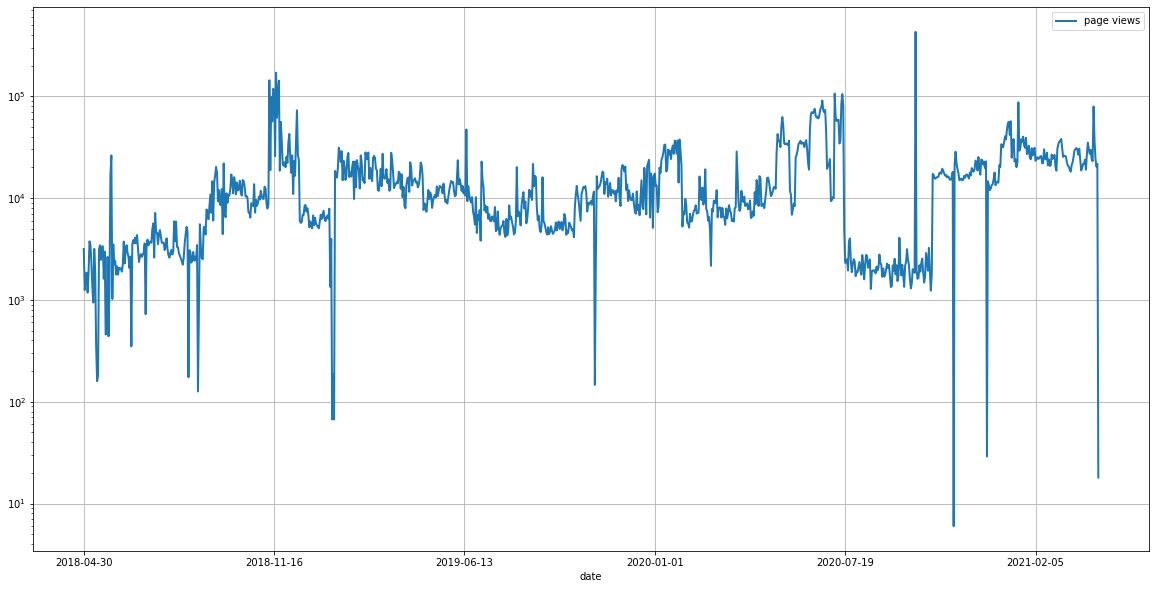

In [9]:
ax = df.plot(figsize=(20, 10), logy=True, linewidth=2)
ax.grid()
plt.show()

In [10]:
png_filename = 'scholia-pageviews-' + now[:10] + ".png"

In [11]:
ax.get_figure().savefig(png_filename)